In [41]:
# Importing the necessary libraries
import pandas as pd

# Load the uploaded train and test datasets
validation_data_path = '/content/twitter_validation.csv'
training_data_path = '/content/twitter_training.csv.zip'

# Read the CSV files into Pandas DataFrames
validation_data = pd.read_csv(validation_data_path)
training_data = pd.read_csv(training_data_path)

# Display first few rows of both datasets
validation_data_head = validation_data.head()
training_data_head = training_data.head()

validation_data_head, training_data_head

(   3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
 0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
 1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
 2  CSGO matchmaking is so full of closet hacking,

In [42]:
# It looks like the datasets might not have been parsed correctly due to improper formatting. Let's try loading both files again, but this time we will inspect their structure carefully before merging.

# Load the datasets with additional options to handle formatting issues
validation_data_clean = pd.read_csv(validation_data_path, on_bad_lines = 'skip')
training_data_clean = pd.read_csv(training_data_path, on_bad_lines = 'skip')

# Inspect the first few rows again to see if they have been loaded correctly this time
validation_data_clean.head(), training_data_clean.head()

(   3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
 0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
 1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
 2  CSGO matchmaking is so full of closet hacking,

In [43]:
# Let's manually clean and reorganize the dataset columns to ensure proper analysis
# For now, we'll focus on extracting the 'Brand', 'Sentiment', and 'Text' columns from the data

# Manually create column names for both datasets
validation_columns = ['ID', 'Brand', 'Sentiment', 'Text']
training_columns = ['ID', 'Brand', 'Sentiment', 'Text']

# Apply the column names to both datasets
validation_data_clean.columns = validation_columns
training_data_clean.columns = training_columns

In [44]:
# Let us list out all the unique brands or names

# List the unique values in the 'Brand' column for both datasets to identify available options
unique_brands_training = training_data_clean['Brand'].unique()
unique_brands_validation = validation_data_clean['Brand'].unique()

# Combine the unique brands from both datasets
all_unique_brands = set(unique_brands_training).union(set(unique_brands_validation))

# Display the unique brands available in the dataset
all_unique_brands

{'Amazon',
 'ApexLegends',
 'AssassinsCreed',
 'Battlefield',
 'Borderlands',
 'CS-GO',
 'CallOfDuty',
 'CallOfDutyBlackopsColdWar',
 'Cyberpunk2077',
 'Dota2',
 'FIFA',
 'Facebook',
 'Fortnite',
 'Google',
 'GrandTheftAuto(GTA)',
 'Hearthstone',
 'HomeDepot',
 'LeagueOfLegends',
 'MaddenNFL',
 'Microsoft',
 'NBA2K',
 'Nvidia',
 'Overwatch',
 'PlayStation5(PS5)',
 'PlayerUnknownsBattlegrounds(PUBG)',
 'RedDeadRedemption(RDR)',
 'TomClancysGhostRecon',
 'TomClancysRainbowSix',
 'Verizon',
 'WorldOfCraft',
 'Xbox(Xseries)',
 'johnson&johnson'}

In [45]:
# Now let's filter for 'Amazon' and 'Microsoft' again after the cleanup
amazon_microsoft_data_cleaned = pd.concat([
    validation_data_clean[validation_data_clean['Brand'].isin(['Amazon', 'Microsoft'])],
    training_data_clean[training_data_clean['Brand'].isin(['Amazon', 'Microsoft'])]
])

# Check the distribution of sentiment for Amazon and Microsoft
sentiment_counts_cleaned = amazon_microsoft_data_cleaned.groupby(['Brand', 'Sentiment']).size().unstack(fill_value = 0)

# Display sentiment distribution
sentiment_counts_cleaned

Sentiment,Irrelevant,Negative,Neutral,Positive
Brand,,,,
Amazon,195,582,1254,319
Microsoft,175,781,852,620


# **Sentiment analysis for Amazon and Microsoft:**

# Amazon:
Irrelevant: 195 mentions

Negative: 582 mentions

Neutral: 1,254 mentions

Positive: 319 mentions

# Microsoft:
Irrelevant: 175 mentions

Negative: 781 mentions

Neutral: 852 mentions

Positive: 620 mentions

The above sentiment analysis suggests that both brands have a higher number of neutral mentions while Microsoft has a slightly more positive sentiment compared to Amazon. However, both brands also experience a significant amount of negative sentiment.

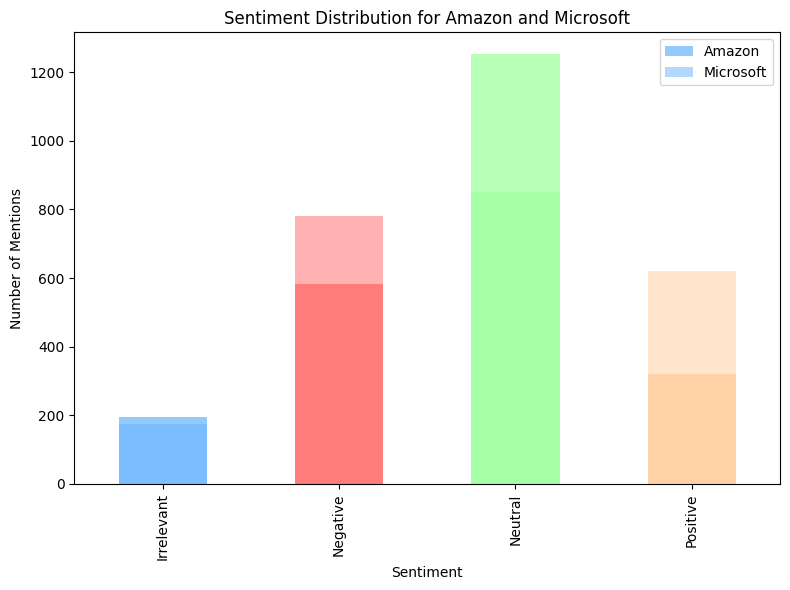

In [46]:
# Let's plot the sentiment trends for both Amazon and Microsoft using the cleaned data

# Plotting sentiment distribution for Amazon and Microsoft

# Importing the necessary libraries
import matplotlib.pyplot as plt

# Set up plot
plt.figure(figsize = (8, 6))

# Plot sentiment distribution for Amazon
sentiment_counts_cleaned.loc['Amazon'].plot(kind = 'bar', color = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'], label = 'Amazon', alpha = 0.7)

# Plot sentiment distribution for Microsoft
sentiment_counts_cleaned.loc['Microsoft'].plot(kind = 'bar', color = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'], label = 'Microsoft', alpha = 0.5)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for Amazon and Microsoft')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

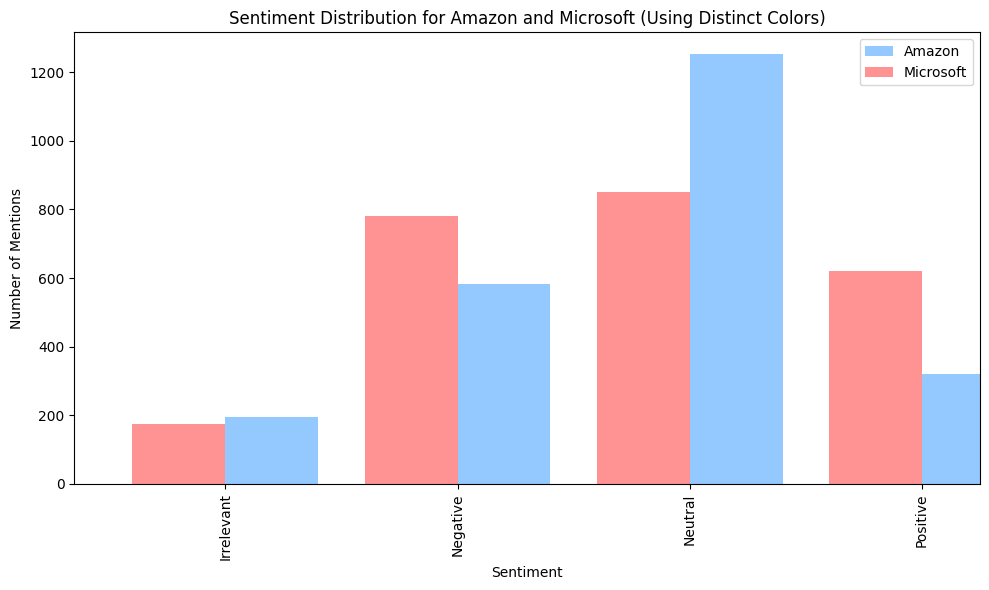

In [47]:
# Setting up side by side plot to improve clarity
plt.figure(figsize = (10, 6))

colors_amazon = ['#66b3ff']
colors_microsoft = ['#ff6666']

# Plot sentiment distribution for Amazon
sentiment_counts_cleaned.loc['Amazon'].plot(kind = 'bar', color = colors_amazon, label = 'Amazon', alpha = 0.7, position = 0, width = 0.4)

# Plot sentiment distribution for Microsoft
sentiment_counts_cleaned.loc['Microsoft'].plot(kind = 'bar', color = colors_microsoft, label = 'Microsoft', alpha = 0.7, position = 1, width = 0.4)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for Amazon and Microsoft (Using Distinct Colors)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [48]:
# Comparing CS-GO and GTA

# Filter the dataset for 'CS-GO' and 'GrandTheftAuto(GTA)' for sentiment analysis
csgo_gta_data_combined = pd.concat([
    validation_data_clean[validation_data_clean['Brand'].isin(['CS-GO', 'GrandTheftAuto(GTA)'])],
    training_data_clean[training_data_clean['Brand'].isin(['CS-GO', 'GrandTheftAuto(GTA)'])]
])

# Check the distribution of sentiment for CS-GO and GTA
sentiment_counts_csgo_gta_combined = csgo_gta_data_combined.groupby(['Brand', 'Sentiment']).size().unstack(fill_value = 0)

# Display sentiment distribution
sentiment_counts_csgo_gta_combined

Sentiment,Irrelevant,Negative,Neutral,Positive
Brand,,,,
CS-GO,644,350,565,777
GrandTheftAuto(GTA),771,603,330,635


# **Sentiment analysis for CS-GO and Grand Theft Auto (GTA):**

# CS-GO:

Irrelevant: 644 mentions

Negative: 350 mentions

Neutral: 565 mentions

Positive: 777 mentions

# Grand Theft Auto (GTA):

Irrelevant: 771 mentions

Negative: 603 mentions

Neutral: 330 mentions

Positive: 635 mentions

This shows that CS-GO has more positive mentions compared to GTA, while GTA has a higher number of negative mentions.

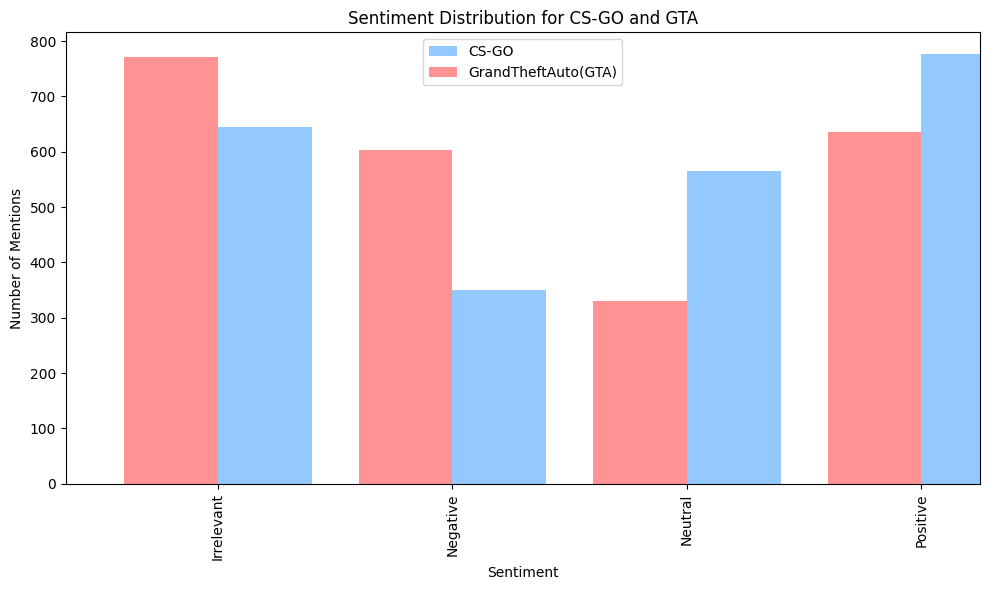

In [49]:
# Setting up side by side plot for CS-GO and GTA
plt.figure(figsize = (10, 6))

colors_cs = ['#66b3ff']
colors_gta = ['#ff6666']

# Plot sentiment distribution for Amazon
sentiment_counts_csgo_gta_combined.loc['CS-GO'].plot(kind = 'bar', color = colors_cs, label = 'CS-GO', alpha = 0.7, position = 0, width = 0.4)

# Plot sentiment distribution for Microsoft
sentiment_counts_csgo_gta_combined.loc['GrandTheftAuto(GTA)'].plot(kind = 'bar', color = colors_gta, label = 'GrandTheftAuto(GTA)', alpha = 0.7, position = 1, width = 0.4)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for CS-GO and GTA')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

# Let us try visualizing trends for specific words

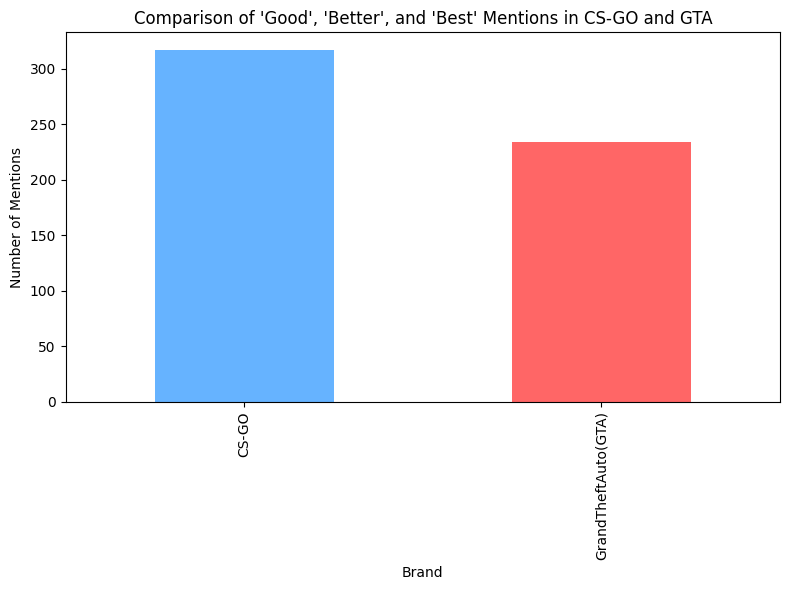

In [50]:
# Comparing some positive mentions in CS-GO and GTA

# Let's filter for mentions containing the words 'good', 'better', or 'best' for CS-GO and GTA

# Filter for mentions containing the words 'good', 'better', or 'best'
positive_mentions_keywords = csgo_gta_data_combined[
    csgo_gta_data_combined['Text'].str.contains('good|better|best', case = False, na = False)
]

# Group by Brand to count how often these words are mentioned for each game
positive_mentions_count = positive_mentions_keywords.groupby('Brand').size()

# Plotting the comparison
plt.figure(figsize = (8, 6))

# Plot the count of 'good', 'better', and 'best' mentions for CS-GO and GTA
positive_mentions_count.plot(kind = 'bar', color = ['#66b3ff', '#ff6666'])

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Mentions')
plt.title("Comparison of 'Good', 'Better', and 'Best' Mentions in CS-GO and GTA")
plt.tight_layout()

# Show plot
plt.show()

The above shows the comparison of mentions containing the positive words "good," "better," and "best" for CS-GO and GTA. The chart shows how often these positive terms appear in discussions about both games, with CS-GO having a slightly higher count of positive mentions.

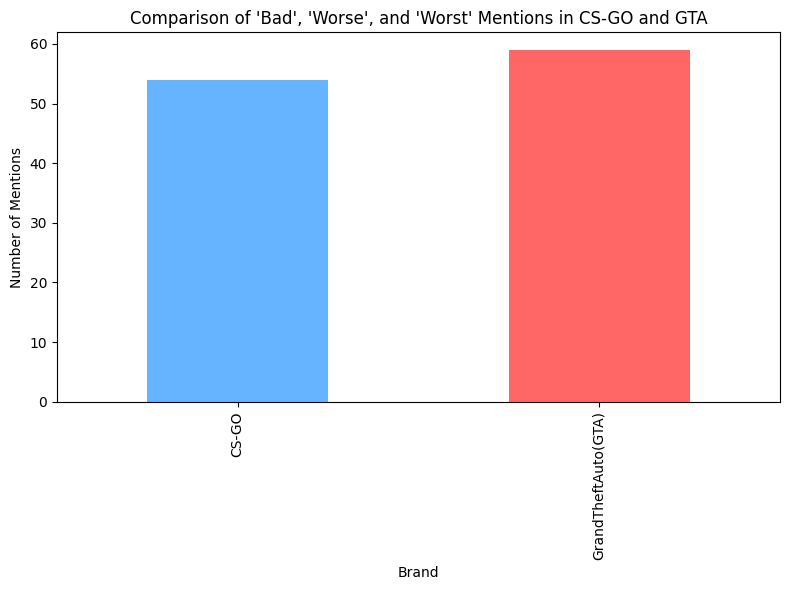

In [51]:
# Comparing some negative mentions in CS-GO and GTA

# Let's filter for mentions containing 'bad', 'worse', or 'worst' for CS-GO and GTA

# Filter for mentions containing the words 'bad', 'worse', or 'worst'
negative_mentions_keywords = csgo_gta_data_combined[
    csgo_gta_data_combined['Text'].str.contains('bad|worse|worst', case = False, na = False)
]

# Group by Brand to count how often these words are mentioned for each game
negative_mentions_count = negative_mentions_keywords.groupby('Brand').size()

# Plotting the comparison
plt.figure(figsize = (8, 6))

# Plot the count of 'bad', 'worse', and 'worst' mentions for CS-GO and GTA
negative_mentions_count.plot(kind = 'bar', color = ['#66b3ff', '#ff6666'])

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Mentions')
plt.title("Comparison of 'Bad', 'Worse', and 'Worst' Mentions in CS-GO and GTA")
plt.tight_layout()

# Show plot
plt.show()

The above shows the comparison of mentions containing the words "bad," "worse," and "worst" for CS-GO and GTA. The chart reflects how often these negative terms appear in discussions about both games, with GTA having a slightly higher count.

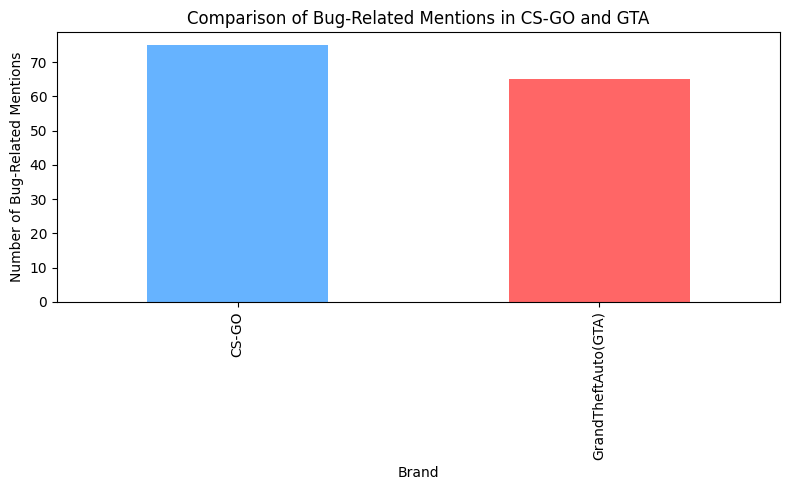

In [52]:
# Comparing mentions of bug, glitch and similar in CS-GO and GTA

# Filter for mentions containing bug-related keywords: 'bug', 'bugs', 'glitch', 'issue', 'problem'
bug_related_mentions = csgo_gta_data_combined[
    csgo_gta_data_combined['Text'].str.contains('bug|bugs|glitch|issue|problem', case = False, na = False)
]

# Group by Brand to count how often these bug-related terms are mentioned for each game
bug_mentions_count = bug_related_mentions.groupby('Brand').size()

# Plotting the comparison of bug-related mentions
plt.figure(figsize = (8, 5))

# Plot the count of bug-related mentions for CS-GO and GTA
bug_mentions_count.plot(kind = 'bar', color = ['#66b3ff', '#ff6666'])

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Bug-Related Mentions')
plt.title("Comparison of Bug-Related Mentions in CS-GO and GTA")
plt.tight_layout()

# Show plot
plt.show()

The above shows the comparison of mentions containing the words "bug," "bugs," "glitch," "issue," and "worst" for CS-GO and GTA. The chart reflects how often these terms appear in discussions about both games, with CS-GO having a slightly higher count.

In [53]:
# Assign sentiment scores
sentiment_score_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Map the sentiment scores to the dataset
csgo_gta_data_combined['Sentiment_Score'] = csgo_gta_data_combined['Sentiment'].map(sentiment_score_mapping)

# Calculate the average sentiment score for CS-GO and GTA
average_sentiment_score = csgo_gta_data_combined.groupby('Brand')['Sentiment_Score'].mean()

# Display the average sentiment scores for CS-GO and GTA
average_sentiment_score

,Sentiment_Score
Brand,
CS-GO,0.252364
GrandTheftAuto(GTA),0.020408


The average sentiment scores are as follows:

- CS-GO: 0.252 (indicating a slightly positive overall sentiment)

- GTA: 0.020 (indicating a nearly neutral overall sentiment)

This suggests that, on average, CS-GO has a more positive sentiment compared to GTA.

In [57]:
# Comparing PS5 and Xbox

# Filter the dataset for entries related to 'PlayStation5(PS5)' and 'Xbox(Xseries)'
ps5_xbox_combined = pd.concat([
    validation_data_clean[validation_data_clean['Brand'].isin(['PlayStation5(PS5)', 'Xbox(Xseries)'])],
    training_data_clean[training_data_clean['Brand'].isin(['PlayStation5(PS5)', 'Xbox(Xseries)'])]
])

# Check the sentiment distribution for PlayStation 5 and Xbox
sentiment_counts_ps5_xbox_combined = ps5_xbox_combined.groupby(['Brand', 'Sentiment']).size().unstack(fill_value = 0)

# Display sentiment distribution
sentiment_counts_ps5_xbox_combined

Sentiment,Irrelevant,Negative,Neutral,Positive
Brand,,,,
PlayStation5(PS5),398,463,525,957
Xbox(Xseries),762,382,417,799


# **Sentiment analysis for PlayStation 5 (PS5) versus Xbox (Xseries):**

# PlayStation 5 (PS5):
Irrelevant: 398

Negative: 463

Neutral: 525

Positive: 957

# Xbox (Xseries):
Irrelevant: 762

Negative: 382

Neutral: 417

Positive: 799

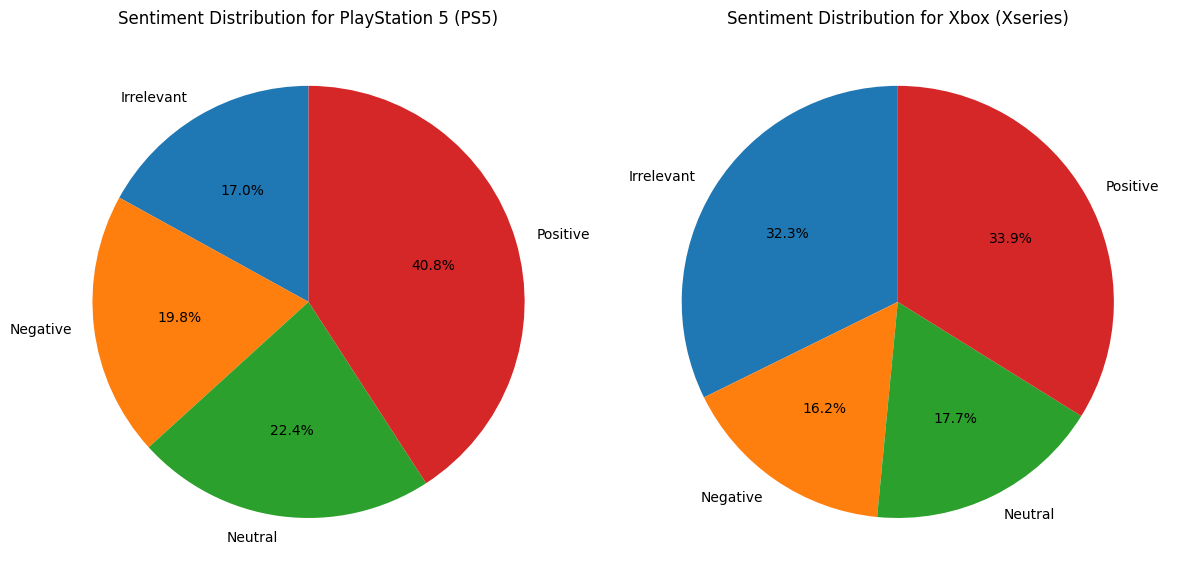

In [60]:
# Creating pie charts for each the sentiment distribution of PlayStation 5 (PS5) and Xbox (Xseries)

# Data for PlayStation 5 (PS5) and Xbox (Xseries)
ps5_sentiment = ps5_xbox_sentiment_distribution.loc['PlayStation5(PS5)']
xbox_sentiment = ps5_xbox_sentiment_distribution.loc['Xbox(Xseries)']

# Plotting the pie chart for PlayStation 5 (PS5)
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.pie(ps5_sentiment, labels = ps5_sentiment.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Sentiment Distribution for PlayStation 5 (PS5)')

# Plotting the pie chart for Xbox (Xseries)
plt.subplot(1, 2, 2)
plt.pie(xbox_sentiment, labels = xbox_sentiment.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Sentiment Distribution for Xbox (Xseries)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the pie charts
plt.show()


In [65]:
# Analysing League of Legends

# Filter the dataset for entries related to 'LeagueOfLegends'
league_data = pd.concat([
    validation_data_clean[validation_data_clean['Brand'].str.contains('LeagueOfLegends', case = False, na = False)],
    training_data_clean[training_data_clean['Brand'].str.contains('LeagueOfLegends', case = False, na = False)]
])

# Check the sentiment distribution for League of Legends
league_sentiment_distribution = league_data['Sentiment'].value_counts()

# Calculate the average sentiment score for League of Legends
league_data['Sentiment_Score'] = league_data['Sentiment'].map(sentiment_score_mapping)
league_average_sentiment_score = league_data['Sentiment_Score'].mean()

league_sentiment_distribution, league_average_sentiment_score


(Sentiment
 Neutral       836
 Negative      650
 Positive      627
 Irrelevant    318
 Name: count, dtype: int64,
 -0.010884997633696167)

# **Sentiment Distribution**
Neutral: 836

Negative: 650

Positive: 627

Irrelevant: 318

# **Average Sentiment Score**

The average sentiment score is approximately -0.011, indicating a nearly neutral sentiment with a slight lean toward the negative.

# **Conclusion**

Based on the sentiment around League of Legends, we can conclude that it is quite balanced, with a large portion being neutral. However, there are slightly more negative mentions compared to positive ones, suggesting that while the community is engaged, there may be ongoing issues or criticisms associated with the game.

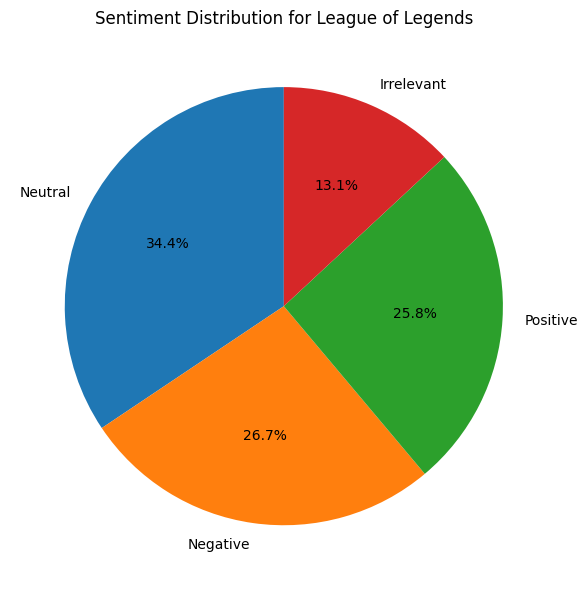

In [68]:
# Visualizing the sentiment distribution for League of Legends

# Data for League of Legends sentiment distribution
league_sentiment = {
    'Neutral': 836,
    'Negative': 650,
    'Positive': 627,
    'Irrelevant': 318
}

# Plotting the pie chart for League of Legends
plt.figure(figsize = (8, 6))
plt.pie(league_sentiment.values(), labels = league_sentiment.keys(), autopct = '%1.1f%%', startangle = 90)
plt.title('Sentiment Distribution for League of Legends')
plt.tight_layout()

# Show the pie chart
plt.show()

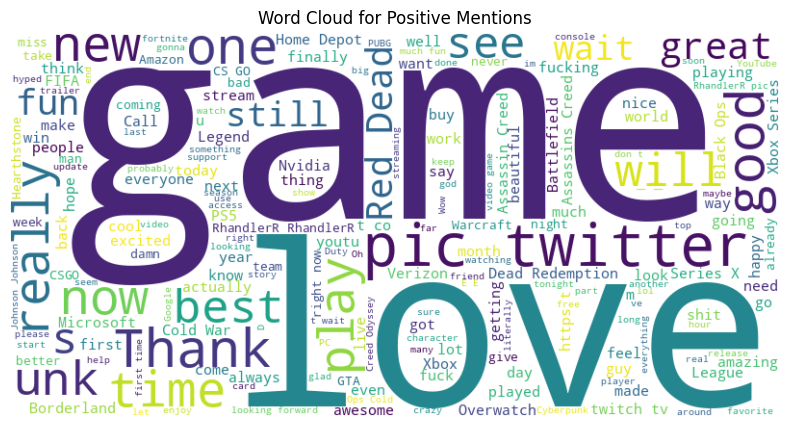

In [71]:
# Creating a word cloud for different sentiment categories

# Importing the necessary libraries
from wordcloud import WordCloud

# Filter for positive mentions in the dataset
positive_mentions = pd.concat([
    validation_data_clean[validation_data_clean['Sentiment'] == 'Positive'],
    training_data_clean[training_data_clean['Sentiment'] == 'Positive']
])

# Combine all the text from positive mentions into a single string
positive_text = ' '.join(positive_mentions['Text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)

# Plot the word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Mentions')
plt.show()

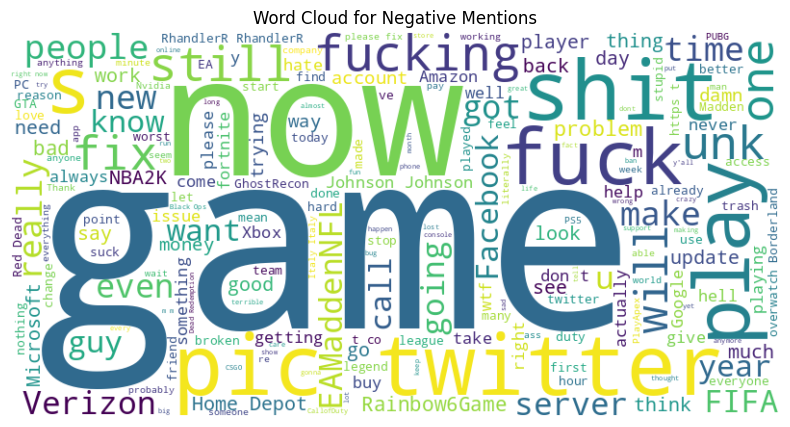

In [72]:
# Filter for negative mentions in the dataset
negative_mentions = pd.concat([
    validation_data_clean[validation_data_clean['Sentiment'] == 'Negative'],
    training_data_clean[training_data_clean['Sentiment'] == 'Negative']
])

# Combine all the text from positive mentions into a single string
negative_text = ' '.join(negative_mentions['Text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Mentions')
plt.show()